# Advanced Algorithmic : Deliverable 1

Group 1 : Bruno Tom, Bruno Jean-Vincent, Silva Roriz Catarina, Tarte Antoine

## Introduction

L'ADEME (Environment and Energy Management Agency) recently launched a call to promote the production of demonstrators and experiments for new mobility solutions for people and goods transport depending on the territories.We decide to respond to the ADEME's call and work on a solution for managing delivery rounds.

The algorithm will calculate the shortest path for traveling between a set of cities, then come back to the starting point. This algorithm will include some constrain like :
* The traffic between cities will depend on the time of the day
* The number of trucks
* Specific place to collect some objects
* Time frame to deliver some objects

In this document we are going to study our problem and determine its complexity before developing it.

First we are going to define precisely what is our problem and its different constrain. After that we are going to study the complexity of our problem with and without its constrains. Then we are going to talk about how we are going to present our graph data for the algorithm. Finaly, we are going to talk about the optimisation that we plan to do with the algorithm.

## Problem presentation

During this study we will first present our basic algorithm in the simplest way, i.e., the delivery truck passes through each city only once.

This algorithm will have a set of vertex that will be linked together. The algorithm will have for mission to connect a subset of vertex which will correspond to the cities concerned by a delivery passing by the shortest way and while returning to its starting point.

For our initial algorithm the problem is therefore :
> What is the shortest cycle passing only once through each vertex of the list L in G?

Then, we will add some constraints:
- Time limit for the delivery of each object 
    * with delivery forbidden if outside this window 
    * or waiting time for the window to open
- Simultaneous delivery with k trucks.
    * Capacity of the trucks (2 or 3 sizes) and the size of the objects
    * Some objects can only be delivered by certain trucks
- Each object has a specific collection location
- Consideration of road traffic (travel time) by varying the length of the stops

## Study of the complexity of the problem

### Problem 1 : Delivery rounds management

> __Delivery rounds management__
> 
> Data: A complete graph G edge-valued, a list of vertexes L
> 
> Question : What is the shortest cycle passing only once through each vertex of the list L in G ?

Here we will try to determine if the problem __Delivery rounds management__ is in __NP-Hard__. For that we will prove that its decision problem of __Delivery rounds management__ is in __NP-Complete__.

1. __Study of the decision problem__

First of all, we start by defining what our decision problem is:

> __Verification of delivery rounds management__
> 
> Data: A complete edge-valued graph G, a list of vertexes L, an integer k
> 
> Question : Is there a cycle passing only once through each vertex of the list L in G and whose sum of the values of the edges its maximum k ?

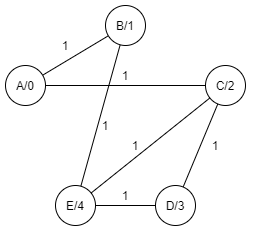
Example graph for the problem __Verification of delivery rounds management__.

In [6]:
V = (0, 1, 2, 3, 4)
E = (
    (0, 1, 1, 0, 0),
    (1, 0, 0, 0, 1),
    (1, 0, 0, 1, 1),
    (0, 0, 1, 0, 1),
    (0, 1, 1, 1, 0),
)
L = (0, 1, 2, 3, 4)
Cycle = (0, 1, 4, 3, 2, 0)

Here we will try to determine if the problem __Verification of delivery rounds management__ is in __NP-Complete__. For that we will first prove that the verification of this problem is in __NP__, then we will prove that this problem is in __NP-Hard__.

The problem is in __NP__ because given a sequence of vertexes, we can check in polynomial time :

* That this sequence of vertexes is indeed a cycle (Complexity : O(N)).

In [2]:
def Verification_Cycle(cycle): 

    for i in range(len(cycle)-1):
        if cycle[i] == cycle[i+1]:
            return False

    if cycle[0] != cycle[len(cycle)-1]:
        return False

    return True

Is_Cycle = Verification_Cycle(Cycle)

if Is_Cycle:
    print("This points follow a cycle")
else:
    print("This points don't follow a cycle")

This points follow a cycle


* That this sequence of vertexes passes only once through each vertex of the list L (Complexity: O(N²)).

In [9]:
def Verification_Vertex(cycle, L):
    Remaining_Vertex = list(L)

    for i in range(len(cycle)):
        for j in range(len(Remaining_Vertex)):
            if cycle[i] == Remaining_Vertex[j]:
                Remaining_Vertex.pop(j)
                break
                
    if len(Remaining_Vertex) != 0:
        return False
    
    return True

Pass_All_Vertex = Verification_Vertex(Cycle, L)

if Pass_All_Vertex:
    print("This cycle pass through all vertexes defined in the liste L only once")
else:
    print("This cycle don't pass through all vertexes defined in the liste L only once")


This cycle pass through all vertexes defined in the liste L at least once


* That the cost of the sequence is under k (Complexity: O(N)).

In [6]:
def Verification_K(cycle, E, k):
    sum_Edge = 0
    
    for i in range(len(cycle)-1):
        sum_Edge += E[cycle[i]][cycle[i+1]]
    
    if sum_Edge < k:
        return True
    else:
        return False
    
k = 6
Its_Lower = Verification_K(Cycle, E, k)

if Its_Lower:
    print("Cycle cost is under k")
else:
    print("Cycle cost is over k")

Cycle cost is under k


We will make a reduction from the __Hamiltonian Cycle__ problem. Since we know that the __Hamiltonian Cycle__ is __NP-Complete__, we will prove here that the __Verification of delivery round management__ is at least as difficult.

To do so, we will find a way to transform, in polynomial time, an instance of __Hamiltonian Cycle__ into an instance of __Verification of delivery round management__, so that both instances admit the same answer.

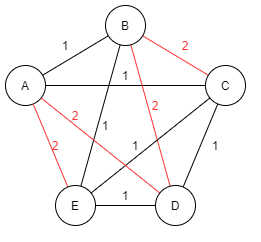

Example graph for the problem __Verification of delivery round management__ and the __Hamiltonian Cycle__.

__Ihc__ is an instance of __Hamiltonian Cycle__, consisting of the graph G=(V,E).

__Ivdrm__ is an instance of __Verification of delivery round management__ defined by:
* The edge-valued graph G '=(V, E(G )+E(G ̅), v : E(G )+E(G ̅) ↦ ℕ) with v(u)=1 ∀ u ∈ E(G ) and v(u)=2 ∀ u ∈ E(G ̅)
* The list of vertexes L=V
* The integer k=|V |-1

The instance __Ihc__ is built in polynomial time: Finding all combinations of vertexes of L not present in G is done in O(|V |²)

Suppose that there exists an algorithm solving the problem __Verification of delivery round management__ in polynomial time.

By applying this algorithm on __Ivdrm__ :
* Either we get the answer yes, the length of the cycle is less than k. In this case, we know that there is a Hamiltonian cycle in G. Indeed, the solution of __Ivdrm__ is a cycle of length |V |-1 by construction of __Ivdrm__. This cycle can only pass through edges of G, since those of G ̅ have cost 2, the length of this solution would be greater than |V |-1. Moreover, this solution passes only once through each vertex, since otherwise its length would be greater than |V |-1. Furthermore, since each vertex of G is in the list L and this cycle passes through each vertex of G, then this cycle passes through all the vertexes of the list L. This cycle is therefore a Hamiltonian cycle in G, so the answer to __Ihc__ is yes.
* Symmetrically, if the answer is no, we deduce that there is no Hamiltonian cycle in G, because otherwise it would constitute a solution to __Ivdrm__ and the answer would be yes.

Thus, we can do a polynomial reduction from the __Hamiltonian Cycle__ to the __Verification of delivery round management__, which proves that __Verification of delivery round management__ is at least as difficult as __Hamiltonian Cycle__. And since we know that __Hamiltonian Cycle__ is in __NP-Complete__, then we can determine that __Delivery Route Management Verification__ is in __NP-Hard__.

Finally as __Verification of delivery round management__ is in both __NP__ and __NP-Hard__, we can conclude that it is at the union of both sets. So __Verification of delivery round management__ is in __NP-Complete__.

2. __Conclusion__

We have seen that the verification of our problem is not solvable in polynomial time. We can therefore deduce that __Delivery rounds management__ is not solvable in polynomial time, and therefore is in __NP-Hard__.

### Problem 2 : Delivery rounds management with variable edge

> __Delivery rounds management with variable edge__
> 
> Data: A complete graph G edge-valued, a list of vertexes L
> 
> Question: What is the shortest cycle passing through only all vertexes of the list L in G ?

Here we will try to determine if the problem __Delivery rounds management with variable edges__ is in __NP-Hard__. For that we will prove that its decision problem of __Delivery rounds management with variable edge__ is in __NP-Complete__.

1. __Study of the decision problem__

First of all, we start by defining what our decision problem is:

> __Verification of Delivery rounds management with variable edges__
> 
> Data: A complete edge-valued graph G, a list of vertexes L, an integer k
> 
> Question: Is there a cycle passing only through each vertexes of the list L in G where the sum of the values of the edges is under k?

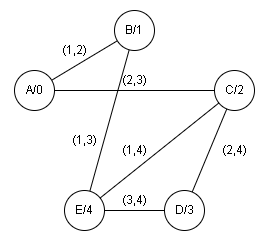

Example graph for the problem __Verification of delivery rounds management with variable edge__.

In [1]:
V = (0, 1, 2, 3, 4)
E = (
    (0, (1,2), (2,3), 0, 0),
    ((1,2), 0, 0, 0, (1,3)),
    ((2,3), 0, 0, (2,4), (1,4)),
    (0, 0, (2,4), 0, (3,4)),
    (0, (1,3), (1,4), (3,4), 0),
)
L = (0, 1, 2, 3, 4)
Cycle = (0, 1, 4, 3, 2, 0)

Here we will try to determine if the problem __Verification of Delivery rounds management with variable edges__ is in __NP-Complete__. For that we will first prove that the verification of this problem is in __NP__, then we will prove that this problem is in __NP-Hard__.

The problem is in __NP__ because given a sequence of vertexes, we can check in polynomial time :

* That this sequence of vertexes is indeed a cycle (Complexity : O(N)).

In [2]:
def Verification_Cycle(cycle): 

    for i in range(len(cycle)-1):
        if cycle[i] == cycle[i+1]:
            return False

    if cycle[0] != cycle[len(cycle)-1]:
        return False

    return True

Is_Cycle = Verification_Cycle(Cycle)

if Is_Cycle:
    print("This points follow a cycle")
else:
    print("This points don't follow a cycle")

This points follow a cycle


* That this sequence of vertexes passes only once through each vertex of the list L (Complexity: O(N²)).

In [9]:
def Verification_Vertex(cycle, L):
    Remaining_Vertex = list(L)

    for i in range(len(cycle)):
        for j in range(len(Remaining_Vertex)):
            if cycle[i] == Remaining_Vertex[j]:
                Remaining_Vertex.pop(j)
                break
                
    if len(Remaining_Vertex) != 0:
        return False
    
    return True

Pass_All_Vertex = Verification_Vertex(Cycle, L)

if Pass_All_Vertex:
    print("This cycle pass through all vertexes defined in the liste L only once")
else:
    print("This cycle don't pass through all vertexes defined in the liste L only once")


This cycle pass through all vertexes defined in the liste L at least once


* That the cost of the sequence is under k (Complexity: O(N)).

In [2]:
def Verification_K(cycle, E, k):
    sum_Edge = 0
    p = 0
    for i in range(len(cycle)-1):
        sum_Edge += E[cycle[i]][cycle[i+1]][p % 2]
        p = (p + E[cycle[i]][cycle[i+1]][p%2] )
    
    if sum_Edge < k:
        return True
    else:
        return False
    
k = 15
Its_Lower = Verification_K(Cycle, E, k)

if Its_Lower:
    print("Cycle cost is under k")
else:
    print("Cycle cost is over k")

Cycle cost is under k


We will make a reduction from the __Delivery rounds management__ problem. Since we know that the __Delivery rounds management__ is __NP-Complete__, we will prove here that the __Verification of Delivery rounds management with variable edges__ is at least as difficult.

To do so, we will find a way to transform, in polynomial time, an instance of __Delivery rounds management__ into an instance of __Verification of Delivery rounds management with variable edges__, so that both instances admit the same answer.

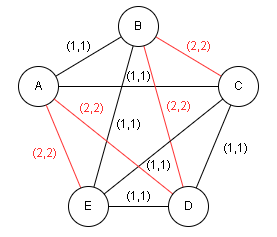


Example graph for the problem __Verification of Delivery rounds management with variable edges__ and the __Delivery rounds management__.

__Idrm__ is an instance of __Delivery rounds management__, consisting of the graph G=(V,E).

__Ivdrmve__ is an instance of __Verification of Delivery rounds management with variable edges__ defined by:
* The edge-valued graph G '=(V, E(G )+E(G ̅), v : E(G )+E(G ̅) ↦ ℕ) with v(u)={1,1} ∀ u ∈ E(G ) and v(u)={2,2} ∀ u ∈ E(G ̅)
* The list of vertexes L=V
* The integer k=|V |-1

The instance __Idrm__ is built in polynomial time: Finding all combinations of vertexes of L not present in G is done in O(|V |²)

Suppose that there exists an algorithm solving the problem __Verification of Delivery rounds management with variable edges__ in polynomial time.

By applying this algorithm on __Ivdrmve__ :
* Either we get the answer yes, the length of the cycle is less than k. In this case, we know that there is a Hamiltonian cycle in G. Indeed, the solution of __Ivdrmve__ is a cycle of length |V |-1 by construction of __Ivdrmve__. This cycle can only pass through edges of G, since those of G ̅ have cost {2,2}, the length of this solution would be greater than |V |-1. Moreover, this solution passes only once through each vertex, since otherwise its length would be greater than |V |-1. Furthermore, since each vertex of G is in the list L and this cycle passes through each vertex of G, then this cycle passes through all the vertexes of the list L. This cycle is therefore a Hamiltonian cycle in G, so the answer to __Idrm__ is yes.
* Symmetrically, if the answer is no, we deduce that there is no Hamiltonian cycle in G, because otherwise it would constitute a solution to __Ivdrmve__ and the answer would be yes.

Thus, we can do a polynomial reduction from the __Delivery rounds management__ to the __Verification of Delivery rounds management with variable edges__, which proves that __Verification of Delivery rounds management with variable edges__ is at least as difficult as __Delivery rounds management__. And since we know that __Delivery rounds management__ is in __NP-Complete__, then we can determine that __Delivery Route Management Verification__ is in __NP-Hard__.

Finally as __Verification of Delivery rounds management with variable edges__ is in both __NP__ and __NP-Hard__, we can conclude that it is at the union of both sets. So __Verification of Delivery rounds management with variable edges__ is in __NP-Complete__.

2. __Conclusion__

We have seen that the verification of our problem is not solvable in polynomial time. We can therefore deduce that __Delivery rounds management with variable edges__ is not solvable in polynomial time, and therefore is in __NP-Hard__.

## Formal presentation of data

For representing graph in our algorithm we are going to use an adjacency matrix, but not a normal one. For creating our graph, we decide to ban loop and multiple edges between two points, because went you seach the shortest path between two points a loop will always add useless length, and between multipule path we will always pick the shortest. 

So because of this simplification, insted of counting the number of connection between vertexes (because it will always be 1) inside the matrix, we will put the weight of this connection. And when there is no connections, the value will be 0.

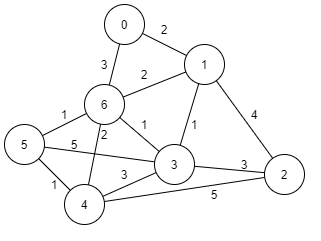
Exemple Graph

So the matrix will look like this for this exemple graph.

In [10]:
matrix = (
    (0, 2, 0, 0, 0, 0, 3),
    (2, 0, 4, 1, 0, 0, 2),
    (0, 4, 0, 3, 4, 0, 0),
    (0, 1, 3, 0, 3, 5, 1),
    (0, 1, 5, 3, 0, 1, 2),
    (0, 0, 0, 5, 1, 0, 1),
    (3, 2, 0, 1, 2, 5, 0),
)

## Operational research

### Problem modeling

1. __Program decision variables__

Given that the Hamiltonian cycle is described by $N²$ variable $X_{i,R}$, where :
- $i$ = the vertex
- $R$ = the rank of the vertex in a cycle.
The decision variable $P$ has a state equal to 1 if the truck takes the road on node $i$ at rank $R$.

Thus program decision variable is :
    
 $$X_{i,R} \text {: State matrix} $$
 
This matrix will allow us to know where the truck passed previously and what will be its next stop.

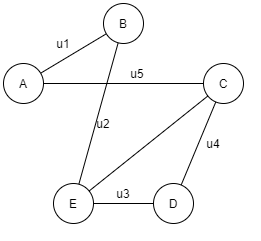
Exemple graph

Exemple of state matrix for the graph above:

| i \ P | 1 | 2 | 3 | 4 | 5 | 6 |
|-------|---|---|---|---|---|---|
|   A   | 1 | 0 | 0 | 0 | 0 | 1 |
|   B   | 0 | 1 | 0 | 0 | 0 | 0 |
|   C   | 0 | 0 | 0 | 0 | 1 | 0 |
|   D   | 0 | 0 | 0 | 1 | 0 | 0 |
|   E   | 0 | 0 | 1 | 0 | 0 | 0 |

2. __Objective function__

With our objective function we try to minimize the travel time for our deliveries. For this we multiply the sum of our weight matrix to our state matrix.

The objective function is:
    $$Min: \sum_{n=1,m=1}^{i,j} M_{n,m} X_{n,m} $$ 

3. __Program Constraints__

In our situation, we have to follow two constraints. 
- We go through each vertice once and only once
- The state matrice is binary (only made of 0 and 1

The mathematical representation of these constraints is the following:

$$C.S:\left\{
    \begin{array}{ll}
        \prod_{n=1}^i \sum_{m=1}^j X_{n,m} = 1  \\
        X_{c,p} \in \{0,1\} \qquad \forall c \in [1,i] \land p \in [1,P]  \\
    \end{array}
\right.$$

With : 
$$
i:\text{ The vertex}\\
P:\text{ Solution state number}\\
i = j \\
M_{ij} :\text{ Weight matrix of the situation (see in formal presentation of data)}
$$

### Comparing different metaheuristics

ACO and génétique

### Ant Cololy Optimisation

In this section we will look at the different formulas used in "Ant Colony Optimization" or ACO and how we transformed them into a line of code to run them. The pieces of code presented here are not exactly what we used for our algorithm, but they are easier to read versions.

Three formulas can be found for setting up ACO, which are used to calculate :
* The probability of an ant to move to a vertex
* The amount of pheromone to be deposited on the path
* The quantity of pheromone to update on the whole graph

In this part we will use many different variables such as :

$$
i : \text{The current city} \\
j : \text{The neighbooring city from i} \\
k : \text{The current ant} \\
t : \text{The current iteration} \\
$$

1. __The probability of an ant to move to a vertex__

This formula is used to determine which is the best route for an ant, depending on whether other ants have already passed by and the distance between the two cities. The result is a probability of which city will be the best. This formula can be parameterized with the variables alpha and beta, which allows to give more importance to the pheromones already present or to the edge size.

$$
p_{ij}^{k}(t) = \frac{\tau_{ij}(t)^{\alpha} \cdot \eta_{ij}^{\beta}}{\sum_{l \in J_{i}^{K}} {\tau_{il}(t)^{\alpha} \cdot \eta_{il}^{\beta}}} \qquad \forall j \in J_{i}^{k}
$$

With : 
$$
J_{i}^{k} : \text{The list of possible moves for an ant k when it is on a city i} \\
\eta_{ij} : \text{The visibility, which is equal to the inverse of the distance between two cities i and j (} \frac{1}{d_{ij}} \text{)} \\
\tau_{ij}(t) : \text{The intensity, the amount of pheromone on between two cities i and j at iteration t} \\
\alpha, \beta : \text{Two parametres that control the relative importance of the intensity and visibility of an edge} \\
$$

This formula can be translated into code as follows:

In [5]:
def Probabilities_To_Travel(matrix, pheromone_matrix, path, cities_to_pass, current_city, alpha, beta):
    available_cities = tuple(city for city in cities_to_pass if city not in path)
    denominator_sum = 0
    probabilities_list = []

    for city in available_cities:
        intensity = pheromone_matrix[current_city][city]
        visibility = 1 / matrix[current_city][city]
        denominator_sum += pow(intensity, alpha) * pow(visibility, beta)

    for city in available_cities:
        intensity = pheromone_matrix[current_city][city]
        visibility = 1 / matrix[current_city][city]
        probability = (pow(intensity, alpha) *
                       pow(visibility, beta)) / denominator_sum
        probabilities_list.append([
            city,
            probability
        ])

    return probabilities_list


2. __The amount of pheromone to be deposited on the path__

This formula is used to calculate the amount of pheromone that an ant should deposit on each edge an ant takes. It will take Q as a parameter to vary the amount of pheromone that ants can deposit on each edge.

$$
\Delta \tau_{ij}^{k}(t) = \frac{Q}{L^{k}(t)} \qquad \forall (i, j) \in T^{k}(t)
$$

With :
$$
T^{k}(t) : \text{The paht made by ant k at iteration t} \\
\Delta \tau_{ij}^{k}(t) : \text{The amount of pheromone that an ant k deposits on each edge of its path} \\
Q : \text{A setup parameter} \\
L^{k}(t) : \text{the path's lenght} \\
$$

This formula can be translated into code as follows:

In [8]:
def Pheromone_To_Apply(pheromone_spread, path_lenght):
    return pheromone_spread / path_lenght

3. __The quantity of pheromone to update on the whole graph__

This formula is used to calculate the amount of pheromone present on the whole graph. To do this it calculates the amount of pheromone that has evaporated using the evaporation factor on all edges, and then adds the pheromones deposited by the ants on the edges they have traveled.

$$
\tau_{ij}(t+1) = (1 - \rho) \cdot \tau_{ij}(t) + \sum_{k=1}^{m} \Delta \tau_{ij}^{k}(t)
$$

With :
$$
\rho : \text{The evaporation coefficient} \\
m : \text{The ant's number} \\
$$

This formula can be translated into code as follows:

In [10]:
def Update_Matrix_Pheromone(pheromone_matrix, path, path_lenght, evaporation_factor, pheromone_spread):
    for i in range(len(pheromone_matrix)):
        for j in range(len(pheromone_matrix)):
            pheromone_matrix[i][j] *= (1 - evaporation_factor)

    for i in range(len(path) - 1):
        pheromone_matrix[path[i]][path[i + 1]] += Pheromone_To_Apply(pheromone_spread, path_lenght)
        pheromone_matrix[path[i + 1]][path[i]] += Pheromone_To_Apply(pheromone_spread, path_lenght)

    return pheromone_matrix

### Experimental design

les bornes et les aurte parramètre

### Solution

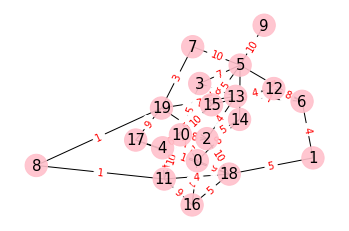

In [2]:
import graph_generation as gg
from main import *

nb_vertex = 20

graph = gg.Get_Adjacency_Matrix(nb_vertex)

Draw_Graph(graph)


cities_to_pass :  (2, 13, 19, 1, 3, 18, 5, 0, 12, 7)


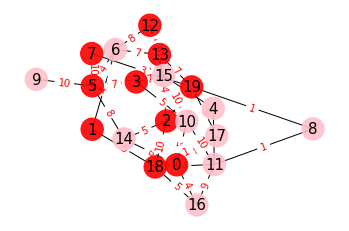

In [3]:
nb_cities_to_pass = 10

cities_to_pass = Get_Cities_To_Pass(nb_vertex, nb_cities_to_pass)
print('cities_to_pass : ', cities_to_pass)

Draw_Graph(graph, cities_to_pass=cities_to_pass)

optimal path for the complete graph :  (1, 18, 0, 3, 5, 7, 19, 2, 13, 12, 1)
optimal path lenght :  72
optimal path :  [1, 18, 0, 10, 3, 5, 7, 19, 2, 13, 12, 6, 1]


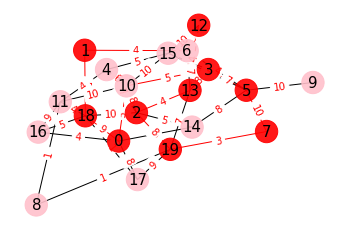

In [4]:
import convertion_tsp as ct
import tsp_ant as ant

tsp_matrix = ct.Convert_Uncomplete_Graph_To_Tsp(graph, nb_vertex, cities_to_pass)

path, path_lenght = ant.Ant_Tsp(tsp_matrix, cities_to_pass)
print('optimal path for the complete graph : ', path)
print('optimal path lenght : ', path_lenght)

full_path = ct.Get_Full_Path_from_Tsp_Path(graph, path)
print('optimal path : ', full_path)

Draw_Graph(graph, cities_to_pass=cities_to_pass, path=full_path)


1
truck n° 1 , path lenght :  
path :  [1, 18, 0, 10, 3, 5, 6, 1]


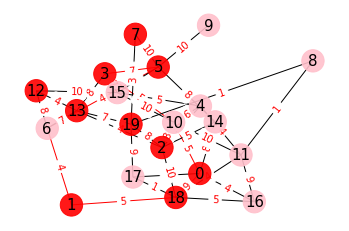

truck n° 2 , path lenght :  
path :  [1, 6, 5, 7, 19, 2, 13, 6, 1]


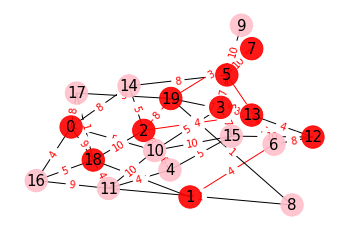

truck n° 3 , path lenght :  
path :  [1, 6, 12, 6, 1]


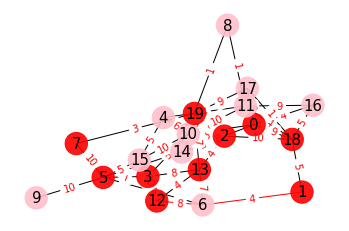

In [5]:
import split_vrp as split

nb_truck = 3

cluster_path = split.Split_After_Tsp(graph, full_path, path_lenght, nb_truck)
for i in range(len(cluster_path)):
    print('truck n°', i + 1, ', path lenght : ', '')
    print('path : ', cluster_path[i])

    Draw_Graph(graph, cities_to_pass=cities_to_pass, path=cluster_path[i])
    

## Bibliography

### Complexity

- https://fr.wikipedia.org/wiki/NP_(complexit%C3%A9)
- https://www.labri.fr/perso/betrema/MC/MC8.html
- https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce
- https://fr.wikipedia.org/wiki/Graphe_hamiltonien
- https://www.fil.univ-lille.fr/~tison/AAC/C17/C10.pdf
- http://www.lix.polytechnique.fr/~bournez/cours/CoursDEAComplexite/00-N-Motivation-Theorie-Complexite.pdf

### Data modelisation

- https://fr.wikipedia.org/wiki/Matrice_d%27adjacence
- https://www.pairform.fr/doc/1/32/180/web/co/Liste.html
- https://fr.wikipedia.org/wiki/Liste_d%27adjacence

### Operational research

- http://www.sietmanagement.fr/decision-mathematique-la-rationalite-calculatoire-recherche-operationnelle-apprentissage-automatique
- https://educnet.enpc.fr/file.php/297/CoursROPonts.pdf
- https://qiskit.org/documentation/stable/0.24/locale/fr_FR/tutorials/optimization/6_examples_max_cut_and_tsp.html
- https://www.iro.umontreal.ca/~bastin/Cours/IFT1575/IFT1575.pdf
- http://ressources.aunege.fr/nuxeo/site/esupversions/2b1c56b6-109d-488a-94a3-3ea525f8beef/ModAidDec/cours/l7/l7.pdf
- https://fr.wikipedia.org/wiki/Recherche_op%C3%A9rationnelle
- https://fr.wikipedia.org/wiki/Fonction_objectif?tableofcontents=0


### Metaheuristics

* https://fr.wikipedia.org/wiki/M%C3%A9taheuristique
* https://www.gerad.ca/~alainh/Metaheuristiques.pdf

### Traveling Salesman Problem

* https://interstices.info/le-probleme-du-voyageur-de-commerce/
* http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf
* https://www.noveltech.dev/fully-connected-graph/
* https://betterprogramming.pub/5-ways-to-find-the-shortest-path-in-a-graph-88cfefd0030f
* https://www.delftstack.com/fr/howto/python/dijkstra-algorithm-python/
* https://fr.acervolima.com/l-algorithme-du-plus-court-chemin-de-dijkstra-gourmand-algo-7-1/
* https://fr.wikipedia.org/wiki/Algorithme_de_colonies_de_fourmis
* https://www.diva-portal.org/smash/get/diva2:1566222/FULLTEXT01.pdf

### Vehicule Routing Problem

* http://www.bernabe.dorronsoro.es/vrp/index.html?/algorithms/ClustRout.html
* https://prolog.univie.ac.at/teaching/LVAs/KFK-TL/WS%2012/TL-Part5-VRP-Intro-Handout.pdf
* https://mdpi-res.com/d_attachment/sustainability/sustainability-12-06987/article_deploy/sustainability-12-06987-v2.pdf?version=1598595539
* https://homes.di.unimi.it/cordone/courses/2018-ae/Lez12-Materiali/Order-firstSplit-secondMethodsForVehicleRoutingProblems-AReview.pdf
* https://daneshyari.com/article/preview/474581.pdf
* https://perso.isima.fr/~lacomme/GT2L/Spring_School/conf/slides/ssiop-plenary-prins.pdf